In [1]:
%pip install numpy pandas tensorflow scikit-learn librosa paramiko scp matplotlib tqdm sounddevice

Note: you may need to restart the kernel to use updated packages.


In [2]:
import trainer
import numpy as np 
import matplotlib.pyplot as plt
import os


In [3]:
def from_the_beginning():
    # List of files to remove
    files_to_remove = [
        'exported_data.json',
        'labels.txt',
        'split_dataset.npy',
        'mfcc_features.npy',
        'model.tflite'
    ]

    # Remove the specified files if they exist
    for file in files_to_remove:
        try:
            if os.path.exists(file):
                os.remove(file)
                print(f"Removed: {file}")
            else:
                print(f"File not found: {file}")
        except Exception as e:
            print(f"Error removing {file}: {e}")
from_the_beginning()

Removed: exported_data.json
File not found: labels.txt
Removed: split_dataset.npy
File not found: mfcc_features.npy
File not found: model.tflite


In [4]:
splited_dataset = trainer.prepare_data()     
mfcc_feature = trainer.get_mfcc(splited_dataset)

Data exported successfully.


  1%|          | 1/198 [00:02<07:04,  2.15s/it]c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\soundClassifier\trainer.py:86: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_waveform, sample_rate = librosa.load(path, sr=32000)
c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\.venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 48%|████▊     | 95/198 [00:11<00:15,  6.83it/s]

3f84618c-spacelab3.m4a
<class 'IndexError'> trainer.py 84
list index out of range


get_mfcc: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]


In [5]:
def get_fft(features):
    """Compute the FFT of the given features."""
    features = (features - np.mean(features)) / np.std(features)  # Normalize the features
    return np.fft.fft(features)

fft_features = {label: get_fft(features) for label, features in splited_dataset.items()}


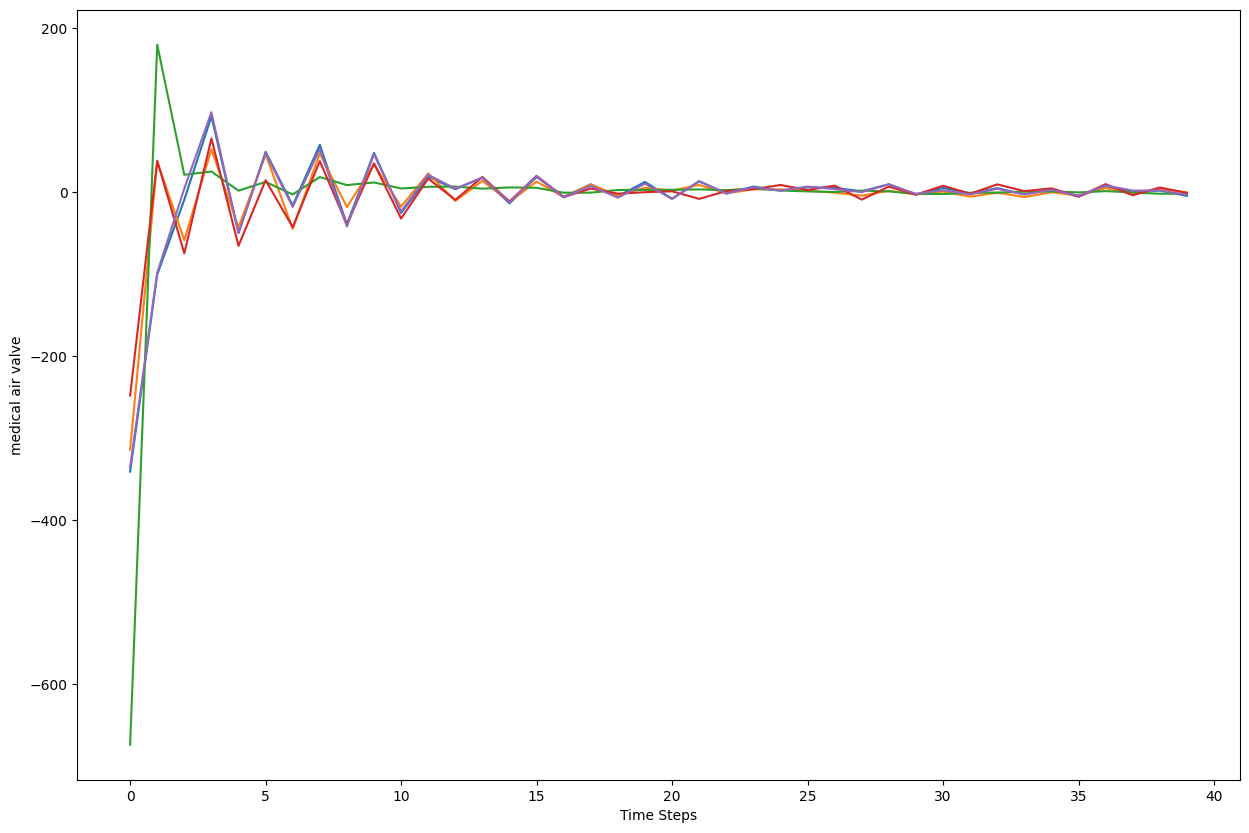

In [6]:
import random

# Plot random samples of values for each key in mfcc_features
fig  = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
for i, (label, features) in enumerate(mfcc_feature.items()):
    if label not in ['Sink/Water', 'medical air valve']:continue
    # ax = fig.add_subplot(len(mfcc_features), 1, i + 1)
    random_samples = random.sample(list(features), min(5, len(features)))  # Get up to 5 random samples
    for sample in random_samples:
        ax.plot(sample, label=label)

    # plt.title(f'Random Samples for {label}')
    ax.set_xlabel('Time Steps')
    ax.set_ylabel(f'{label}')
    # plt.legend()

# plt.tight_layout()
plt.show()

In [7]:

mfcc_features = {label: (features * 2 if label not in ['Rolling Carts', 'HVAC', 'Speech'] else features) for label, features in mfcc_feature.items()}

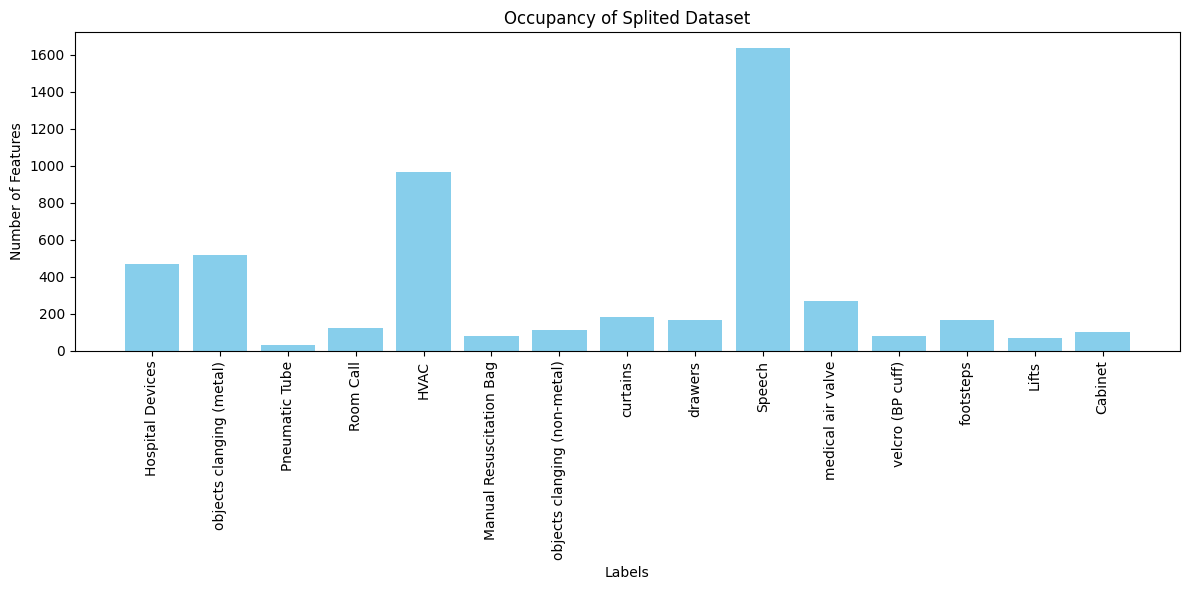

In [8]:
# Visualize the occupancy of the splited dataset
occupancy = {label: len(features) for label, features in mfcc_features.items()}
labels = list(occupancy.keys())
values = list(occupancy.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Number of Features')
plt.title('Occupancy of Splited Dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [9]:

x_train, x_test, y_train, y_test, label = trainer.split_data(mfcc_features)
with open('labels.txt', 'w') as f:
    for lbl in label:
        f.write(f"{lbl}\n")



Training set size: 3478
Testing set size: 1491


In [10]:
model = trainer.build_model(x_train, x_test, y_train, y_test)

c:\Users\Hoon\Nextcloud3\Projects\soundClassifier\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 20, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,583 (381.18 KB)

 Trainable params: 97,583 (381.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3750 - loss: 3.2643 - val_accuracy: 0.8042 - val_loss: 0.7030
Epoch 2/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7127 - loss: 0.8537 - val_accuracy: 0.8779 - val_loss: 0.3977
Epoch 3/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.6047 - val_accuracy: 0.9168 - val_loss: 0.2892
Epoch 4/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8463 - loss: 0.4704 - val_accuracy: 0.9249 - val_loss: 0.2624
Epoch 5/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8929 - loss: 0.3565 - val_accuracy: 0.9396 - val_loss: 0.2190
Epoch 6/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9033 - loss: 0.3108 - val_accuracy: 0.9329 - val_loss: 0.2413
Epoch 7/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.3078 - val_accuracy: 0.9450 - val_loss: 0.1873
Epoch 8/100
435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2608 - val_accu

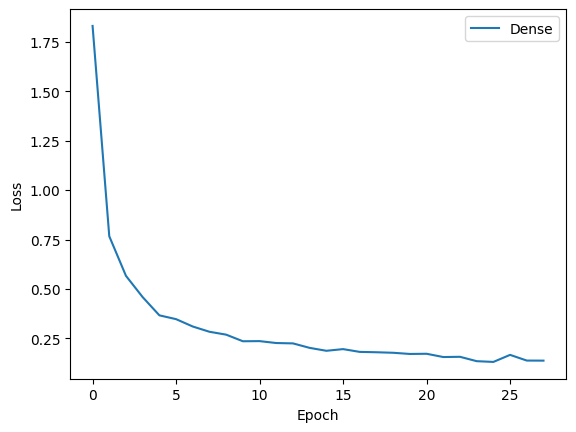

In [11]:

trainer.train(model, x_train, x_test, y_train, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0852
Test Loss: 0.0917
Test Accuracy: 0.9725
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                              precision    recall  f1-score   support

            Hospital Devices       1.00      0.96      0.98       152
    objects clanging (metal)       0.99      0.98      0.99       159
              Pneumatic Tube       1.00      1.00      1.00         6
                   Room Call       1.00      1.00      1.00        47
                        HVAC       0.97      0.95      0.96       289
    Manual Resuscitation Bag       1.00      1.00      1.00        21
objects clanging (non-metal)       1.00      0.93      0.96        40
                    curtains       0.97      1.00      0.98        56
                     drawers       0.81      0.90      0.85        48
                      Speech       0.98      0.99      0.99       475
           medical air valve       1.00      0.98      0.99        85
       

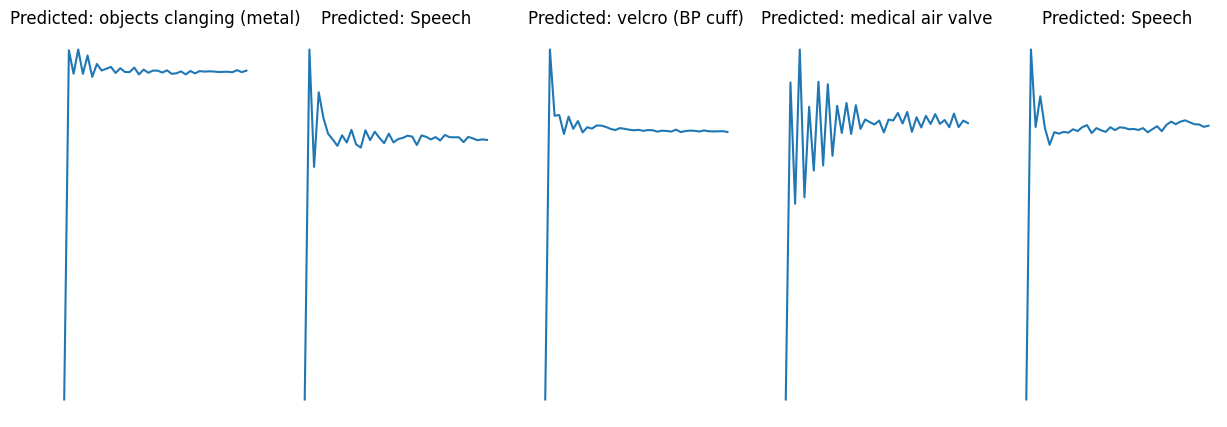

In [12]:
trainer.evaluate(model, x_test, y_test, label)

In [13]:
import tensorflow as tf
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmpwlak_ch6\assets


INFO:tensorflow:Assets written to: C:\Users\Hoon\AppData\Local\Temp\tmpwlak_ch6\assets


Saved artifact at 'C:\Users\Hoon\AppData\Local\Temp\tmpwlak_ch6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  1997952097392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1997952102320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1997952491664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1997952493952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992149260368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992149258432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992149264768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992149265648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992149409408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1992149410288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  19921494132

In [14]:
def predict_labels(x_test, model_path='model.tflite'):
    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Prepare the input data
    x_test_input = np.array([x_test.reshape(1, len(x_test), 1)], dtype=np.float32)
    
    # Set the tensor for the input
    interpreter.set_tensor(input_details[0]['index'], x_test_input[0])

    # Run the model
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Process the output data
    predicted_classes_tflite = np.argmax(output_data, axis=1)[0]
    # Get the labels from the dataset
    
    return predicted_classes_tflite

In [15]:
t = len(x_test)
for x, y in zip(x_test, y_test):
    resx = label[predict_labels(x)]
    resy = label[np.argmax(y)]
    if resx != resy:
        print(resx, '\t\t != \t' , resy)
        t -=1

print(t/len(x_test))

Lifts 		 != 	 Hospital Devices
Speech 		 != 	 HVAC
HVAC 		 != 	 Speech
curtains 		 != 	 Speech
drawers 		 != 	 objects clanging (metal)
HVAC 		 != 	 objects clanging (non-metal)
Speech 		 != 	 Hospital Devices
Speech 		 != 	 objects clanging (metal)
Speech 		 != 	 objects clanging (metal)
drawers 		 != 	 HVAC
Speech 		 != 	 HVAC
drawers 		 != 	 HVAC
HVAC 		 != 	 drawers
objects clanging (metal) 		 != 	 Speech
Cabinet 		 != 	 drawers
HVAC 		 != 	 objects clanging (non-metal)
Cabinet 		 != 	 Lifts
drawers 		 != 	 HVAC
drawers 		 != 	 HVAC
curtains 		 != 	 Speech
HVAC 		 != 	 drawers
Speech 		 != 	 Hospital Devices
Cabinet 		 != 	 Lifts
drawers 		 != 	 HVAC
drawers 		 != 	 HVAC
Cabinet 		 != 	 HVAC
Speech 		 != 	 HVAC
drawers 		 != 	 HVAC
drawers 		 != 	 HVAC
Cabinet 		 != 	 medical air valve
Cabinet 		 != 	 drawers
Cabinet 		 != 	 medical air valve
Speech 		 != 	 HVAC
HVAC 		 != 	 objects clanging (non-metal)
HVAC 		 != 	 Hospital Devices
drawers 		 != 	 Cabinet
Speech 		 != 	 HVAC
HVAC 